In [4]:
# IMPORTANT INSTRUCTION
'''  
Some of the function are borrowed from previous practical (i.e read_graph , plot graph , writeoutput ,calculate_approxfactor) 

Lp_Rounding_vc was constructed for this practical to find the solution of VC via pulp 

'''




'  \nSome of the function are borrowed from previous practical (i.e read_graph , plot graph , writeoutput ,calculate_approxfactor) \n\nLp_Rounding_vc was constructed for this practical to find the solution of VC via pulp \n\n'

In [5]:

import networkx as nx
import matplotlib.pyplot as plt
import time
import csv
import os
import ast

import pulp
from pulp import LpProblem, LpMinimize, LpVariable, lpSum



def read_graph(filename):
    G = nx.Graph()
    try:
        with open(f"inputs/{filename}", 'r') as file:
            n, m = map(int, file.readline().split())
            for _ in range(m):
                u, v = map(int, file.readline().split())
                G.add_edge(u, v)
    except IOError:
        print(f"Error opening file: {filename}")
        return None
    return G, n,m




def Lp_Rounding_vc(G):
    start = time.time()
    
    prob = LpProblem("LP_Relaxed_Vertex_Cover", LpMinimize)
    
    x = {v: LpVariable(f"x_{v}", lowBound=0, upBound=1, cat='Continuous') for v in G.nodes()}
    
    prob += lpSum(x[v] for v in G.nodes())
    
    for u, v in G.edges():
        prob += x[u] + x[v] >= 1
    
    prob.solve(pulp.PULP_CBC_CMD(msg=False))
    
    fractional_sol = {v: pulp.value(x[v]) for v in G.nodes()}
    
    cover = [v for v in G.nodes() if fractional_sol[v] >= 0.5]
    
    end = time.time()
    
    print("Fractional solution:")
    print(fractional_sol)
    print("\nRounded cover:")
    print(cover)
    
    return cover, end - start




def plot_graph(G, highlight_nodes=None, title="Graph", pos=None, name=None):
    if not pos:
        pos = nx.spring_layout(G)

    
    # fixed layout for consistency , can also pass a seed as attribute for consistency across the devices 
    # pos above return the dictionary position of each vertex 
    # print(pos)
    
    plt.figure(figsize=(8, 6))

    nx.draw(G, pos, with_labels=True, node_color='lightblue',
            edge_color='gray', node_size=700)

    if highlight_nodes:
        nx.draw_networkx_nodes(
            G, pos, nodelist=highlight_nodes, node_color='orange', node_size=900)
    plt.title(title)
    print(name)
    plt.show()

    return pos


def writeoutput(solution, time, m, n, sol_len, approxfactor):
    fileEmptyCheck = (not os.path.exists("output.csv")) or (
        os.path.getsize("output.csv") == 0)

    if fileEmptyCheck:
        with open("output.csv", 'w', newline='') as output:
            writer = csv.writer(output)
            writer.writerow(["Input size", "Solution", "Solution Length", "Time Taken", "Approximation Factor"])
            writer.writerow([f"{m},{n}", solution,sol_len, time, approxfactor])
            
    else:
        with open("output.csv", 'a', newline='') as output:
            writer = csv.writer(output)
            writer.writerow([f"{m},{n}", solution, sol_len, time, approxfactor])


def calculate_approxfactor(index, lplen , filename="inputs/previous_outputs.csv"):
    
    fileEmptyCheck = (not os.path.exists(filename)) or (os.path.getsize(filename) == 0)

    if fileEmptyCheck :
        print(f"error: {filename} not found. .")
        return
    
    greedy_sol_len=0
    with open(filename, 'r') as file:
        csv_reader = csv.reader(file)
        csv_reader=list(csv_reader)
        
        greedy_sol_len=len(ast.literal_eval(csv_reader[index][1])) # GEN AI USED HERE
    
    return greedy_sol_len ,greedy_sol_len/lplen
        







Graph from input1.txt
Input Size 10 10
input_1


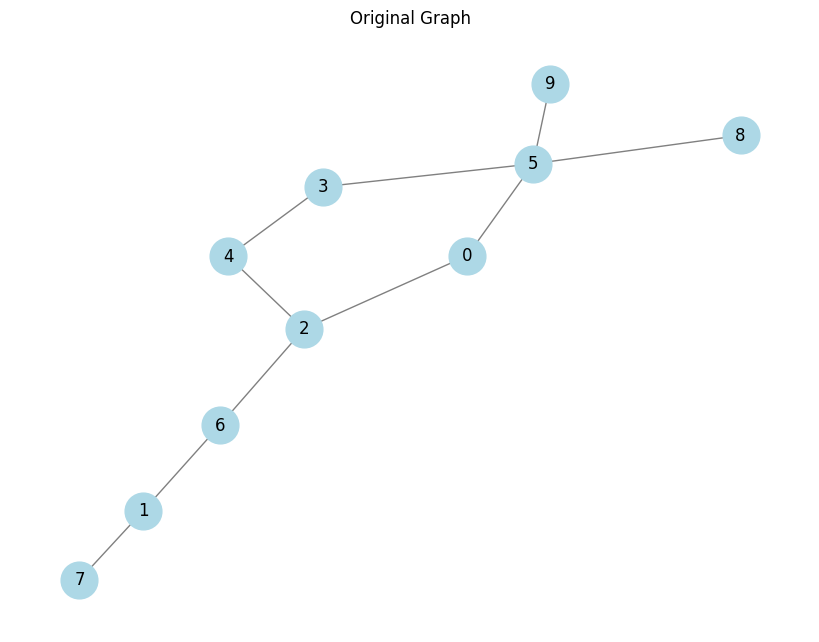

Fractional solution:
{2: 1.0, 4: 0.0, 3: 1.0, 5: 1.0, 8: 0.0, 0: 0.0, 1: 1.0, 7: 0.0, 6: 0.0, 9: 0.0}

Rounded cover:
[2, 3, 5, 1]
LP Rounding Vertex Cover: [2, 3, 5, 1]
Size: 4, Time: 0.022211790084838867s
greedy solution length from previous assignments: 6 
approximation factor(comparison with previous assignments): 1.5 
output_1


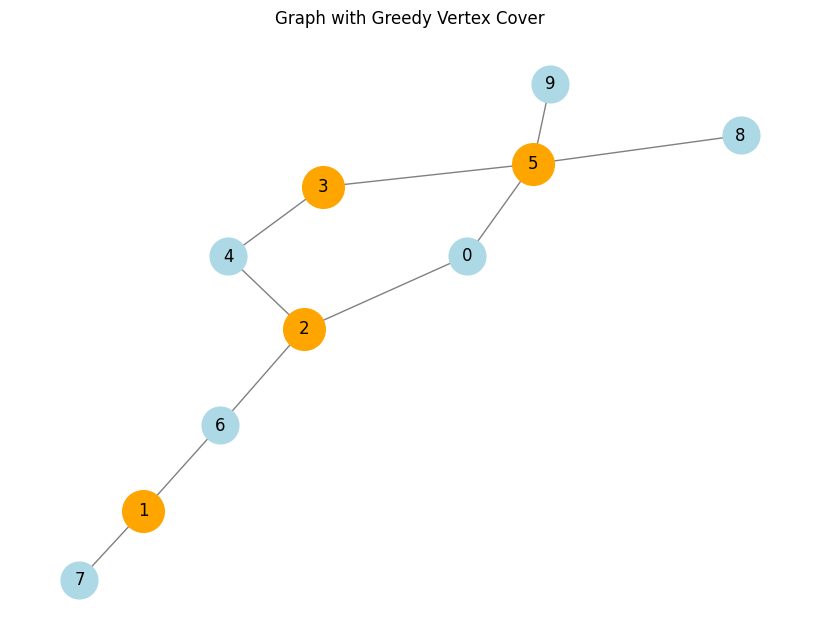


Graph from input2.txt
Input Size 10 20
input_2


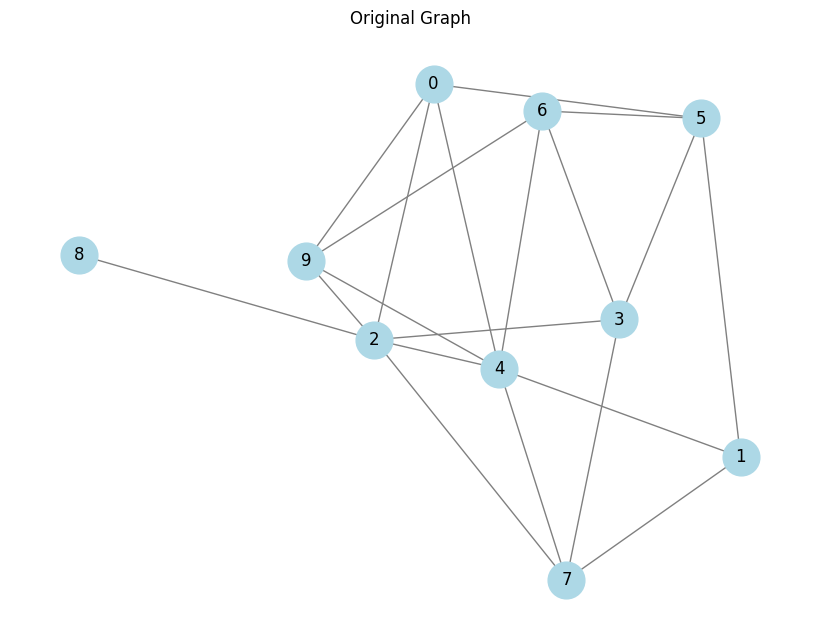

Fractional solution:
{4: 0.5, 9: 0.5, 3: 0.5, 7: 0.5, 6: 0.5, 0: 0.5, 2: 0.5, 5: 0.5, 8: 0.5, 1: 0.5}

Rounded cover:
[4, 9, 3, 7, 6, 0, 2, 5, 8, 1]
LP Rounding Vertex Cover: [4, 9, 3, 7, 6, 0, 2, 5, 8, 1]
Size: 10, Time: 0.01710677146911621s
greedy solution length from previous assignments: 8 
approximation factor(comparison with previous assignments): 0.8 
output_2


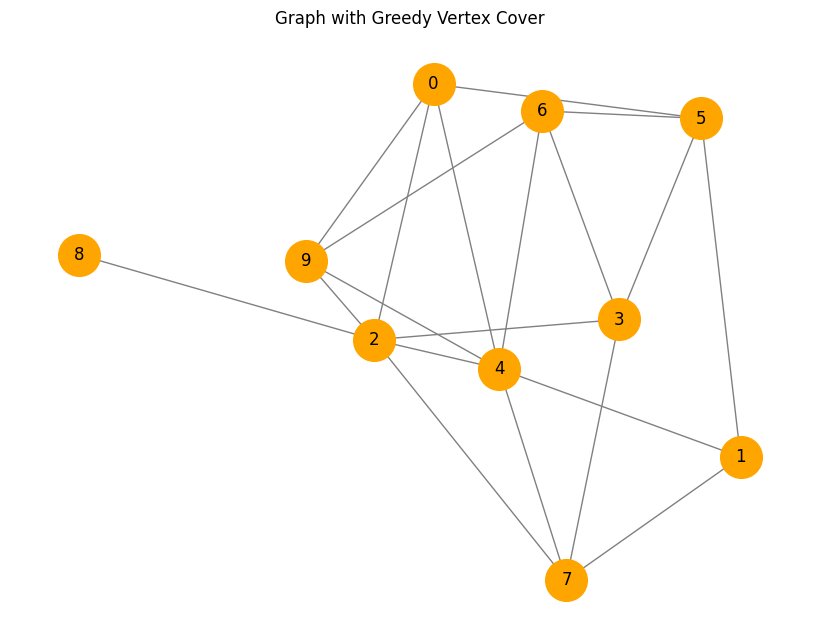


Graph from input3.txt
Input Size 10 30
input_3


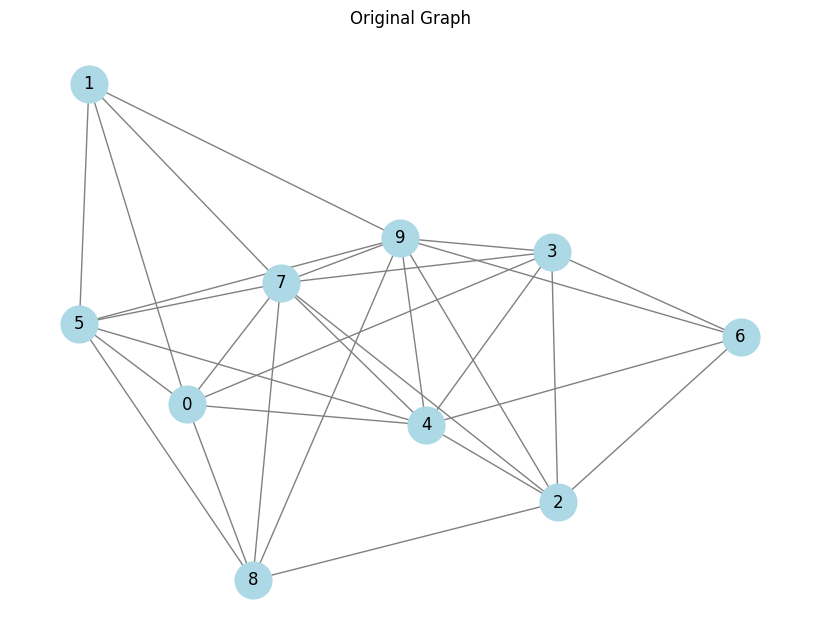

Fractional solution:
{3: 0.5, 4: 0.5, 9: 0.5, 7: 0.5, 6: 0.5, 5: 0.5, 8: 0.5, 0: 0.5, 1: 0.5, 2: 0.5}

Rounded cover:
[3, 4, 9, 7, 6, 5, 8, 0, 1, 2]
LP Rounding Vertex Cover: [3, 4, 9, 7, 6, 5, 8, 0, 1, 2]
Size: 10, Time: 0.017675399780273438s
greedy solution length from previous assignments: 10 
approximation factor(comparison with previous assignments): 1.0 
output_3


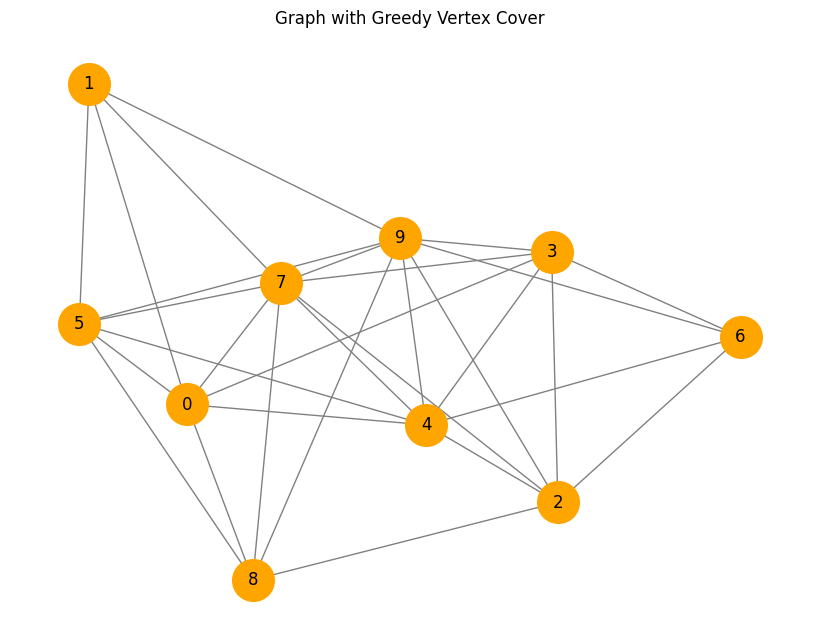


Graph from input4.txt
Input Size 10 40
input_4


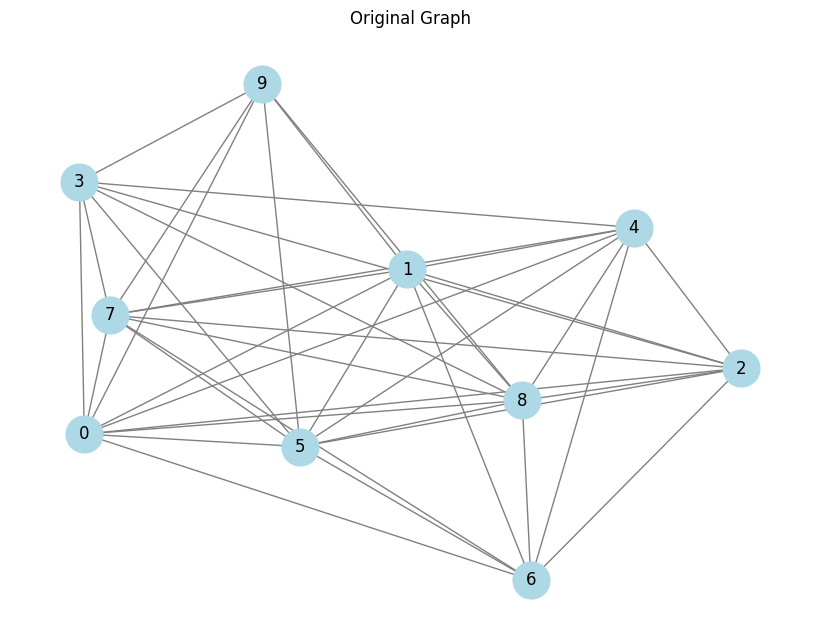

Fractional solution:
{3: 0.5, 4: 0.5, 7: 0.5, 6: 0.5, 5: 0.5, 0: 0.5, 2: 0.5, 8: 0.5, 9: 0.5, 1: 0.5}

Rounded cover:
[3, 4, 7, 6, 5, 0, 2, 8, 9, 1]
LP Rounding Vertex Cover: [3, 4, 7, 6, 5, 0, 2, 8, 9, 1]
Size: 10, Time: 0.035883188247680664s
greedy solution length from previous assignments: 10 
approximation factor(comparison with previous assignments): 1.0 
output_4


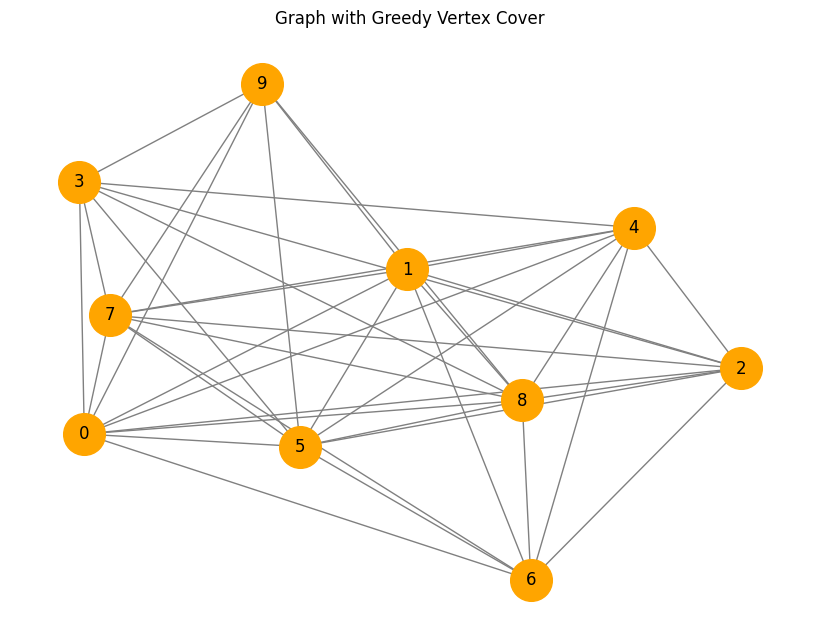


Graph from input5.txt
Input Size 20 20
input_5


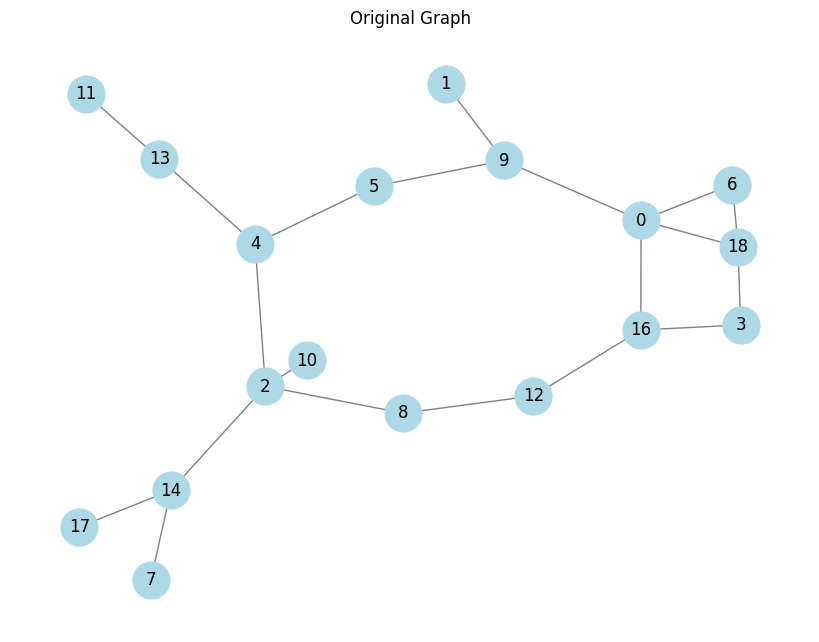

Fractional solution:
{6: 0.5, 18: 0.5, 12: 0.5, 16: 0.5, 3: 0.5, 8: 0.5, 1: 0.5, 9: 0.5, 2: 0.5, 14: 1.0, 4: 0.5, 5: 0.5, 0: 0.5, 11: 0.5, 13: 0.5, 10: 0.5, 17: 0.0, 7: 0.0}

Rounded cover:
[6, 18, 12, 16, 3, 8, 1, 9, 2, 14, 4, 5, 0, 11, 13, 10]
LP Rounding Vertex Cover: [6, 18, 12, 16, 3, 8, 1, 9, 2, 14, 4, 5, 0, 11, 13, 10]
Size: 16, Time: 0.022430896759033203s
greedy solution length from previous assignments: 14 
approximation factor(comparison with previous assignments): 0.875 
output_5


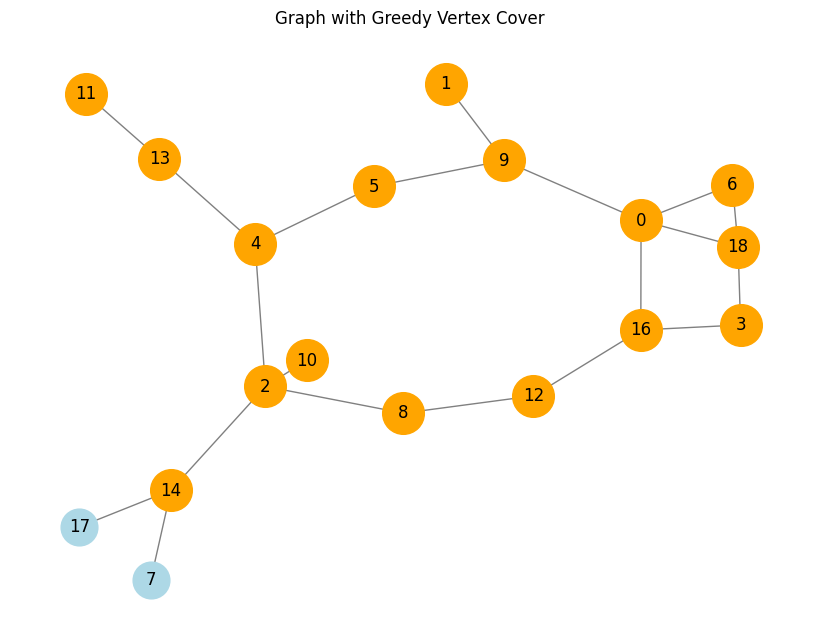


Graph from input6.txt
Input Size 20 30
input_6


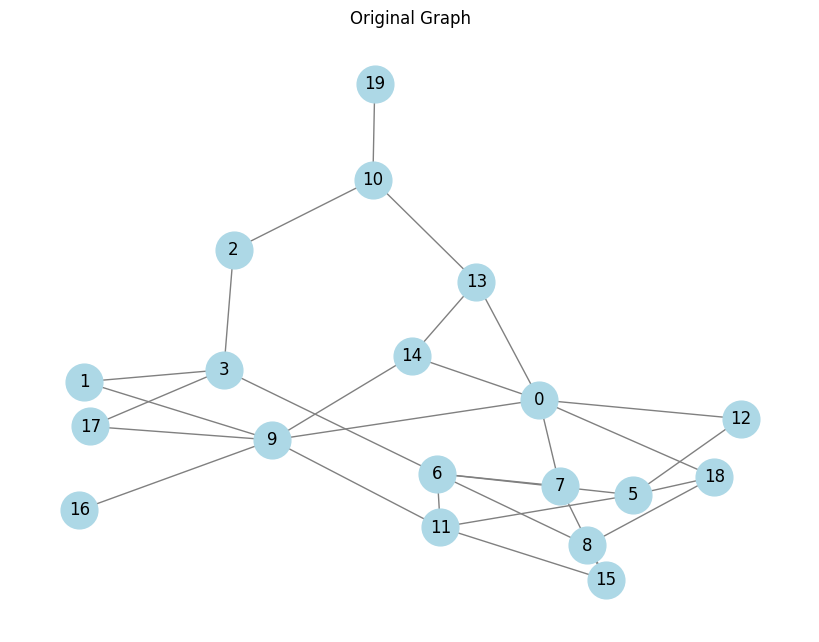

Fractional solution:
{9: 1.0, 14: 0.5, 8: 0.5, 18: 0.5, 11: 0.5, 17: 0.0, 15: 0.5, 1: 0.0, 3: 1.0, 0: 0.5, 13: 0.5, 6: 0.5, 5: 0.5, 12: 0.5, 16: 0.0, 7: 0.5, 2: 0.0, 10: 1.0, 19: 0.0}

Rounded cover:
[9, 14, 8, 18, 11, 15, 3, 0, 13, 6, 5, 12, 7, 10]
LP Rounding Vertex Cover: [9, 14, 8, 18, 11, 15, 3, 0, 13, 6, 5, 12, 7, 10]
Size: 14, Time: 0.023115158081054688s
greedy solution length from previous assignments: 16 
approximation factor(comparison with previous assignments): 1.1428571428571428 
output_6


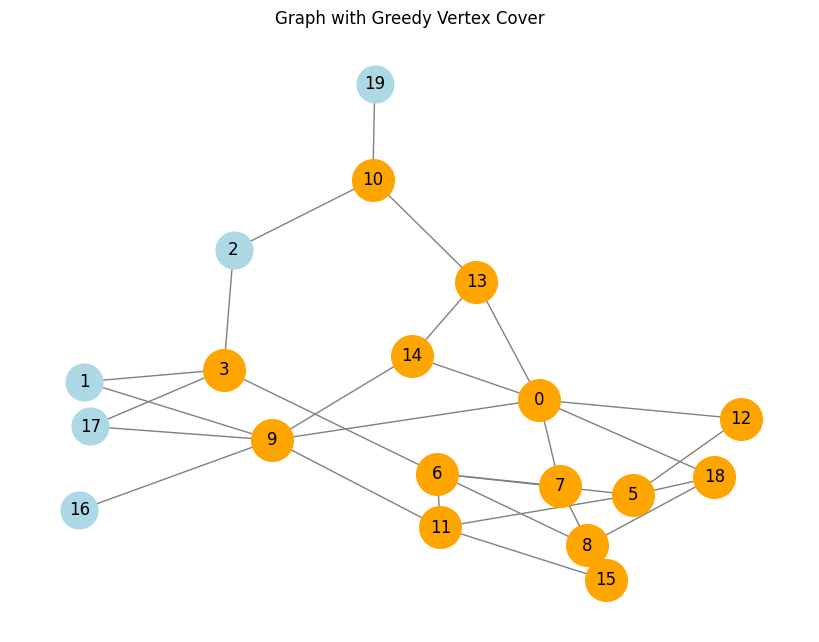


Graph from input7.txt
Input Size 20 40
input_7


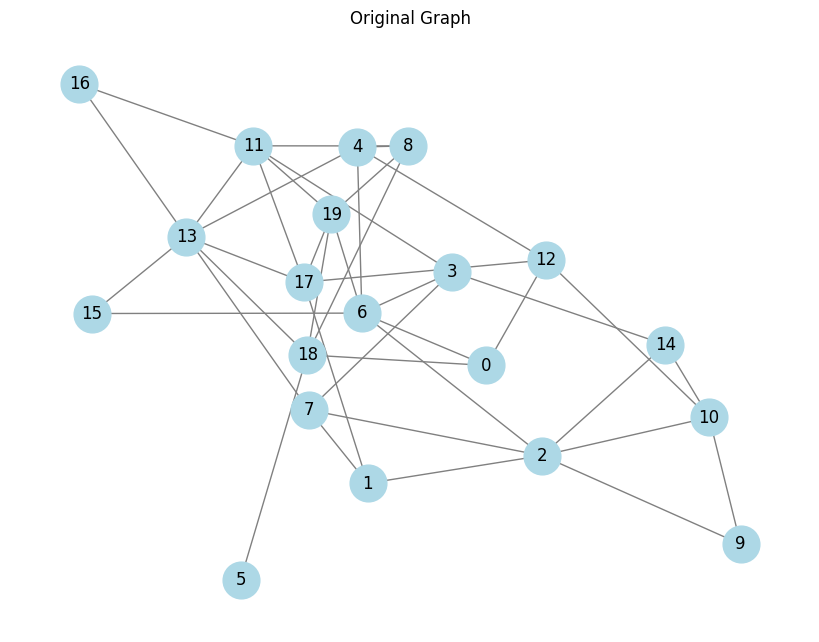

Fractional solution:
{6: 0.5, 15: 0.5, 3: 0.5, 7: 0.5, 4: 0.5, 12: 0.5, 8: 0.5, 18: 0.5, 10: 0.5, 11: 0.5, 17: 0.5, 2: 0.5, 14: 0.5, 13: 0.5, 19: 0.5, 5: 0.5, 9: 0.5, 1: 0.5, 16: 0.5, 0: 0.5}

Rounded cover:
[6, 15, 3, 7, 4, 12, 8, 18, 10, 11, 17, 2, 14, 13, 19, 5, 9, 1, 16, 0]
LP Rounding Vertex Cover: [6, 15, 3, 7, 4, 12, 8, 18, 10, 11, 17, 2, 14, 13, 19, 5, 9, 1, 16, 0]
Size: 20, Time: 0.0199429988861084s
greedy solution length from previous assignments: 16 
approximation factor(comparison with previous assignments): 0.8 
output_7


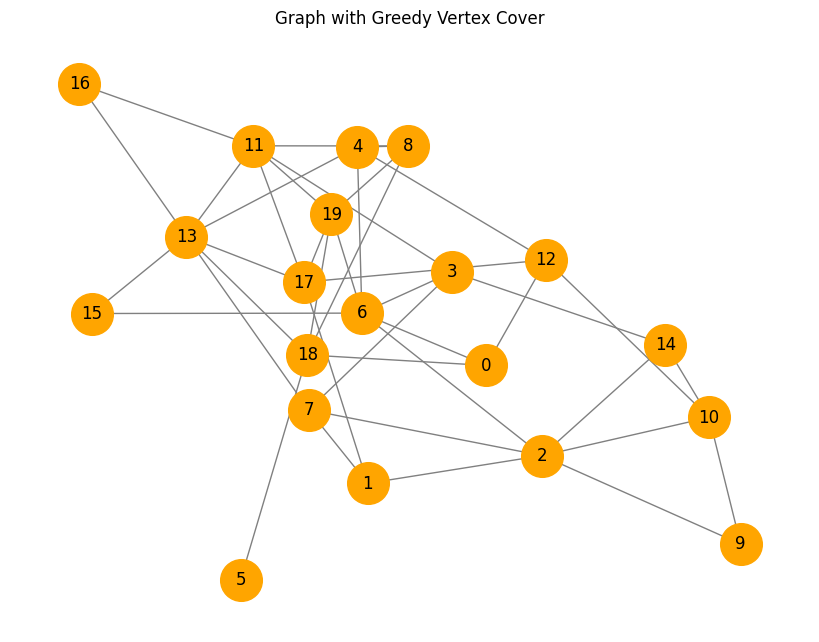


Graph from input8.txt
Input Size 20 50
input_8


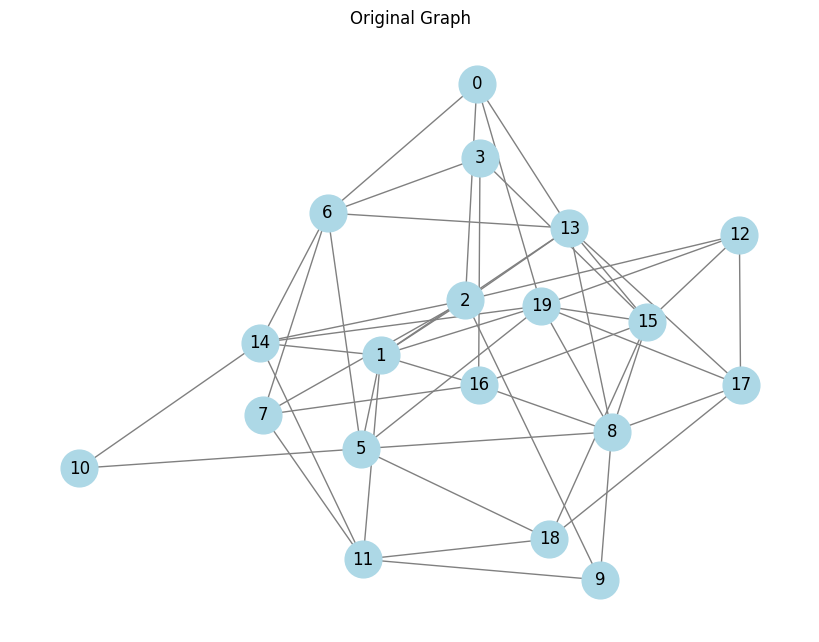

Fractional solution:
{12: 0.5, 19: 0.5, 3: 0.5, 16: 0.5, 5: 0.5, 10: 0.5, 8: 0.5, 9: 0.5, 14: 0.5, 0: 0.5, 2: 0.5, 11: 0.5, 17: 0.5, 18: 0.5, 15: 0.5, 13: 0.5, 7: 0.5, 6: 0.5, 1: 0.5}

Rounded cover:
[12, 19, 3, 16, 5, 10, 8, 9, 14, 0, 2, 11, 17, 18, 15, 13, 7, 6, 1]
LP Rounding Vertex Cover: [12, 19, 3, 16, 5, 10, 8, 9, 14, 0, 2, 11, 17, 18, 15, 13, 7, 6, 1]
Size: 19, Time: 0.03465390205383301s
greedy solution length from previous assignments: 18 
approximation factor(comparison with previous assignments): 0.9473684210526315 
output_8


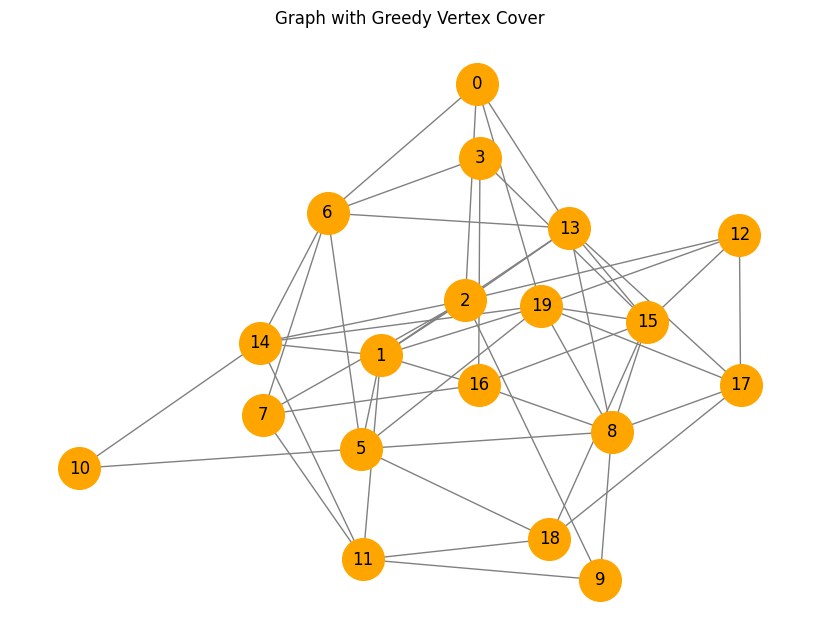

In [6]:
def main():
    if os.path.exists("output.csv"):
        os.remove("output.csv")

    for i in range(1, 9):
        filename = f"input{i}.txt"
        G ,n,m= read_graph(filename)
        if G is None:
            return


        print(f"\nGraph from {filename}")
        print("Input Size", n , m)
        pos = plot_graph(G, title="Original Graph",name=f"input_{i}") # saving the position of input graph before showing the output
        
        solution, time_taken = Lp_Rounding_vc(G)
        sol_len=len(solution)
        
        print(f"LP Rounding Vertex Cover: {solution}")
        print(f"Size: {sol_len}, Time: {time_taken}s")
        greed_sol_len, approxfactor=calculate_approxfactor(i,sol_len)
        print(f"greedy solution length from previous assignments: {greed_sol_len} ")
        print(f"approximation factor(comparison with previous assignments): {approxfactor} ")
        
        
        plot_graph(G, highlight_nodes=solution, title="Graph with Greedy Vertex Cover", pos=pos, name=f"output_{i}")

        if i == 1:
            writeoutput(solution, time_taken, 10, 10,sol_len,approxfactor)
        elif i == 2:
            writeoutput(solution, time_taken, 10, 20,sol_len,approxfactor)
        elif i == 3:
            writeoutput(solution, time_taken, 10, 30,sol_len,approxfactor)
        elif i == 4:
            writeoutput(solution, time_taken, 10, 40,sol_len,approxfactor)
        elif i == 5:
            writeoutput(solution, time_taken, 20, 20,sol_len,approxfactor)

        elif i == 6:
            writeoutput(solution, time_taken, 20, 30,sol_len,approxfactor)

        elif i == 7:
  
            writeoutput(solution, time_taken, 20, 40,sol_len,approxfactor)

        elif i == 8:
            writeoutput(solution, time_taken, 20, 50,sol_len,approxfactor)            


main()